<a href="https://colab.research.google.com/github/Joshclone/Form/blob/master/Britavia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MAV – Britavia International Airlines Report

**Objective**: Using Machine learning principles (Random Forest) to model and visualise key data with a view to helping staff better
understand what factors impacted levels of ‘satisfaction’ for passengers using the airline.

Importing the necessary libraries (NumPy and Pandas) for creating and storing data in a dataframe as a Python object with Pandas and performing tabular functions with Numpy. Seaborn,Matplotlib and Plotly Express for visualisations. Scikit-learn is a Python module for machine learning

In [ ]:
###Importing the necessary libraries

import pandas as pd
import numpy as np
from google.colab import data_table
data_table.enable_dataframe_formatter()
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    roc_auc_score,
    roc_curve,
    log_loss,
)

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Set plot style
sns.set_style("whitegrid")

Extract, Transform, and Load (ETL) process: Import, Clean, and Prepare the Data.

In [ ]:
# Load the dataset

df = pd.read_csv("/content/BRITAVIA.csv", encoding='latin-1')


In [ ]:
# Display the first few rows

df.head()

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Destination,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,Male,Y,13,Under 18,Personal Travel,Eco Plus,4760,India,...,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,Male,N,25,25 to 34,Business travel,Business,235,Republic of Ireland,...,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,Female,Y,26,25 to 34,Business travel,Business,4760,India,...,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,Female,Y,25,25 to 34,Business travel,Business,560,Norway,...,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,Male,Y,61,55 to 64,Business travel,Business,4760,India,...,5,3,3,4,4,3,3,3,0,0.0


In [ ]:
# Display the last few rows

df.tail()

,Ref,id,Gender,Satisfied,Age,Age Band,Type of Travel,Class,Flight Distance,Destination,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
103899,103899,94171,Female,N,23,18 to 24,Business travel,Eco,4760,India,...,2,2,3,1,4,2,3,2,3,0.0
103900,103900,73097,Male,Y,49,45 to 54,Business travel,Business,4760,India,...,5,5,5,5,5,5,5,4,0,0.0
103901,103901,68825,Male,N,30,25 to 34,Business travel,Business,4760,India,...,5,4,3,2,4,5,5,4,7,14.0
103902,103902,54173,Female,N,22,18 to 24,Business travel,Eco,4760,India,...,1,1,4,5,1,5,4,1,0,0.0
103903,103903,62567,Male,Y,27,25 to 34,Business travel,Business,4760,India,...,1,1,1,1,4,4,3,1,0,0.0


In [ ]:
###Check the shape of the dataset

df.shape

(103904, 27)

**The dataset shows 103904 rows and 27 columns**

In [ ]:
# Get basic information about the dataset

print("\nDataset Information:")
print(df.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Ref                                103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Satisfied                          103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Age Band                           103904 non-null  object 
 6   Type of Travel                     103904 non-null  object 
 7   Class                              103904 non-null  object 
 8   Flight Distance                    103904 non-null  int64  
 9   Destination                        103904 non-null  object 
 10  Continent                          103904 non-null  object 
 11  Inflight wifi ser

In [ ]:
##Summary statistics of the data

df.describe()

,Ref,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,4164.071066,2.522319,3.060248,2.756852,2.976825,3.202023,3.250250,3.398666,3.358071,3.382247,3.350930,3.631708,3.304185,3.640331,3.286245,14.818390,15.181275
std,29994.645522,37463.812252,15.114964,1346.755749,1.447848,1.525143,1.398993,1.277703,1.329625,1.349607,1.365819,1.333104,1.288478,1.315715,1.181056,1.265501,1.175822,1.312373,38.313911,38.774453
min,0.000000,1.000000,7.000000,235.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,4760.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,4760.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,4760.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,5940.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


**DATA CLEANING**

In [ ]:
####Let's check for duplicates in the dataset

duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


In [ ]:
# Check for missing values

print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Ref                                    0
id                                     0
Gender                                 0
Satisfied                              0
Age                                    0
Age Band                               0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Destination                            0
Continent                              0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service         

**As seen above 310 missing values was observed in the "Arrival Delay in Minutes" column**

In [ ]:
###Fill missing values in 'Arrival Delay in Minutes' with mean

mean_arrival_delay = df['Arrival Delay in Minutes'].mean()
df['Arrival Delay in Minutes'].fillna(mean_arrival_delay, inplace=True)

In [ ]:
###After filling the missing values with the mean value, then check again to be
## sure the values have been filled

print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Ref                                  0
id                                   0
Gender                               0
Satisfied                            0
Age                                  0
Age Band                             0
Type of Travel                       0
Class                                0
Flight Distance                      0
Destination                          0
Continent                            0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                     

In [ ]:
# Drop unnecessary columns like the "Ref Number" and "id Number"

df.drop(["Ref", "id"], axis=1, inplace=True)

**EXPLORATORY DATA ANALYSIS**

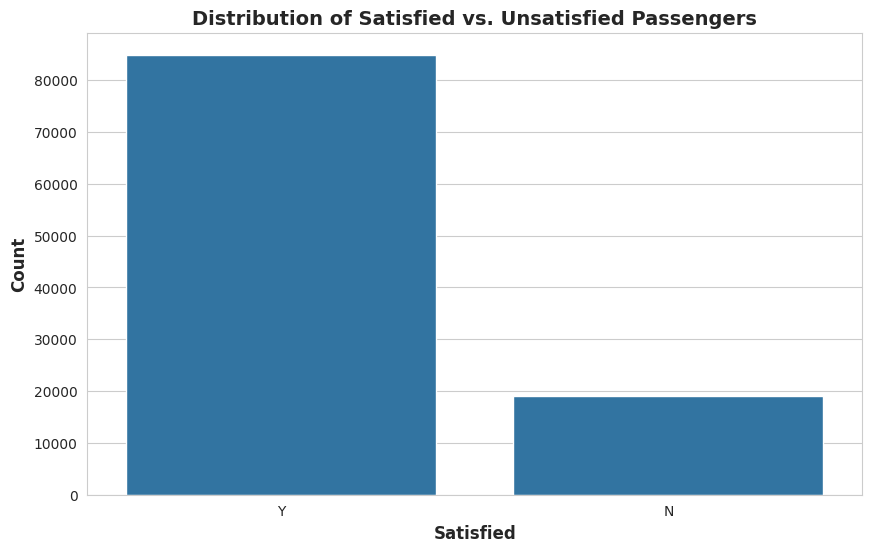

In [ ]:
# Visualization of the Distribution of 'Satisfied' (Target Variable)

plt.figure(figsize=(10, 6))
sns.countplot(x="Satisfied", data=df)
plt.title("Distribution of Satisfied vs. Unsatisfied Passengers",{'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Satisfied", fontsize=12, fontweight='bold')
plt.ylabel("Count", {'fontsize': 12, 'fontweight': 'bold'})
plt.show()

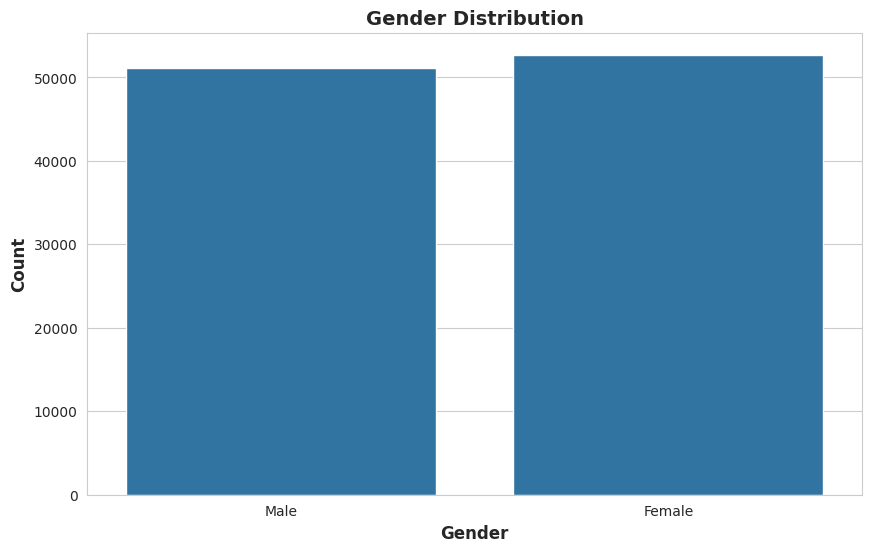

In [ ]:
# Visualization of the Gender Distribution

plt.figure(figsize=(10, 6))
sns.countplot(x="Gender", data=df)
plt.title("Gender Distribution",{'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Gender",fontsize=12, fontweight='bold')
plt.ylabel("Count",fontsize=12, fontweight='bold')
plt.show()

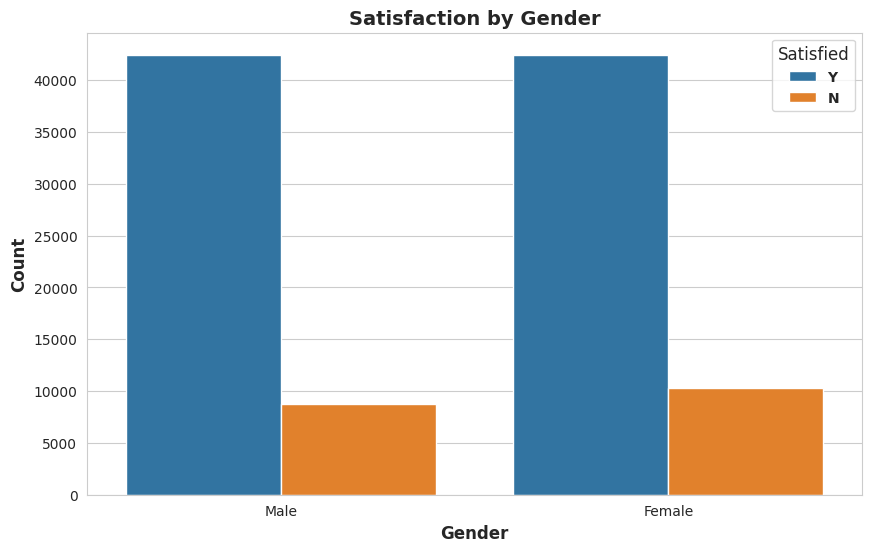

In [ ]:
# Visualization of the Satisfaction by Gender

plt.figure(figsize=(10, 6))
sns.countplot(x="Gender", hue="Satisfied", data=df)
plt.title("Satisfaction by Gender",{'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Gender", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.legend(title="Satisfied", loc="upper right", title_fontsize=12, prop={'weight': 'bold'})
plt.show()

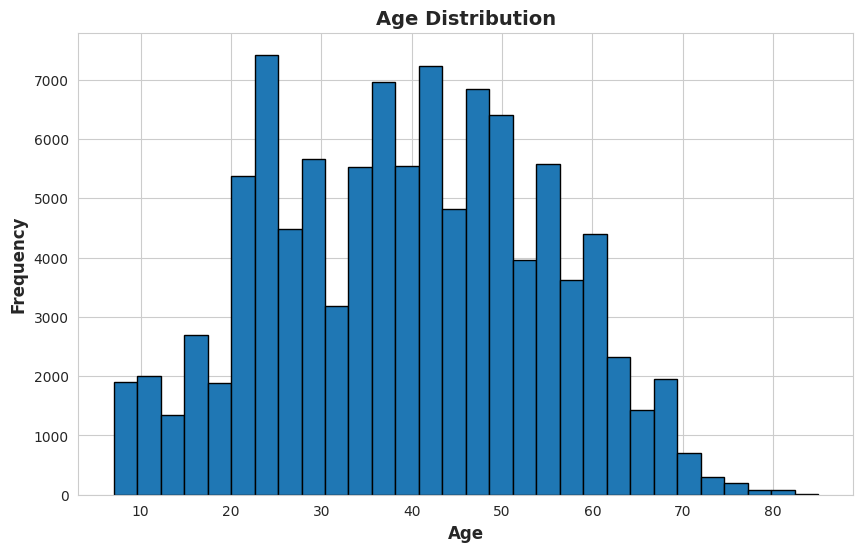

In [ ]:
# Visualization of Age Distribution

plt.figure(figsize=(10, 6))
plt.hist(df["Age"], bins=30, edgecolor="k")
plt.title("Age Distribution",{'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Age", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')
plt.show()

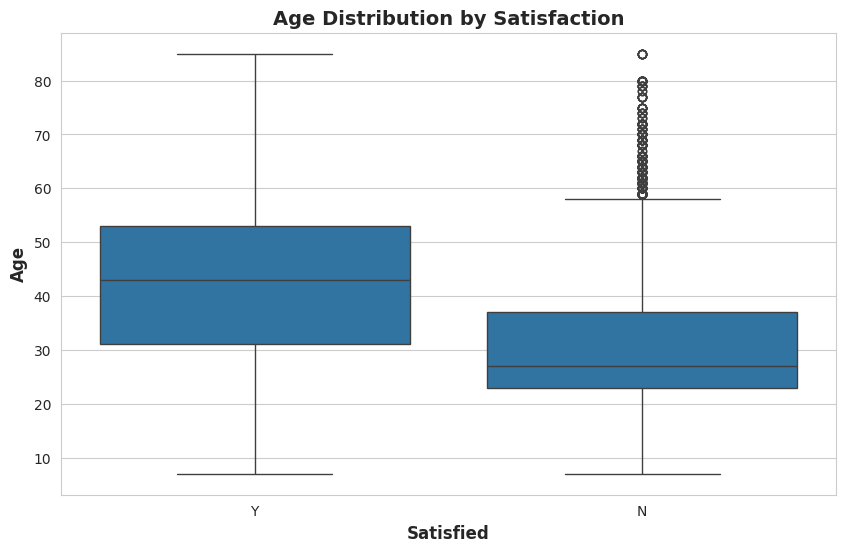

In [ ]:
# Visualization of the Satisfaction by Age

plt.figure(figsize=(10, 6))
sns.boxplot(x="Satisfied", y="Age", data=df)
plt.title("Age Distribution by Satisfaction", {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Satisfied", fontsize=12, fontweight='bold')
plt.ylabel("Age", fontsize=12, fontweight='bold')
plt.show()

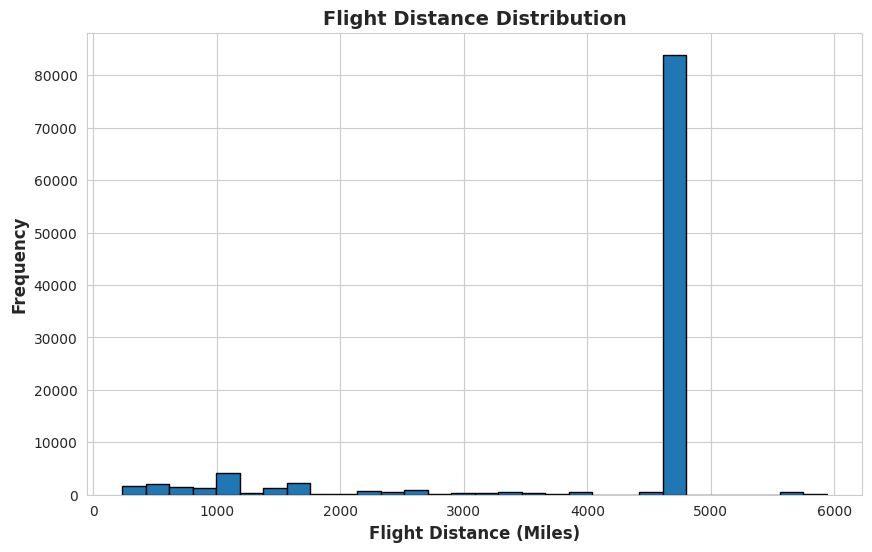

In [ ]:
# Visualization of the Flight Distance Distribution

plt.figure(figsize=(10, 6))
plt.hist(df["Flight Distance"], bins=30, edgecolor="k")
plt.title("Flight Distance Distribution", {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Flight Distance (Miles)", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')
plt.show()

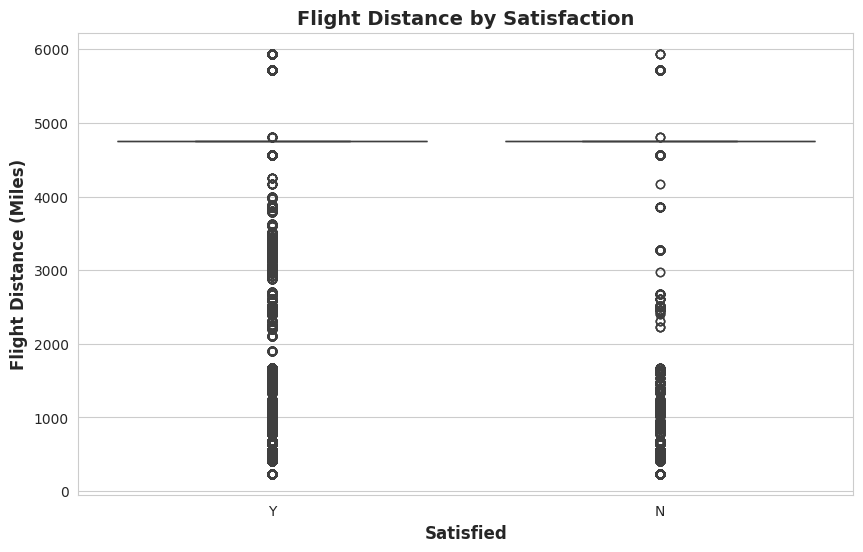

In [ ]:
# Visualization of the Satisfaction by Flight Distance

plt.figure(figsize=(10, 6))
sns.boxplot(x="Satisfied", y="Flight Distance", data=df)
plt.title("Flight Distance by Satisfaction", {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Satisfied", fontsize=12, fontweight='bold')
plt.ylabel("Flight Distance (Miles)", fontsize=12, fontweight='bold')
plt.show()

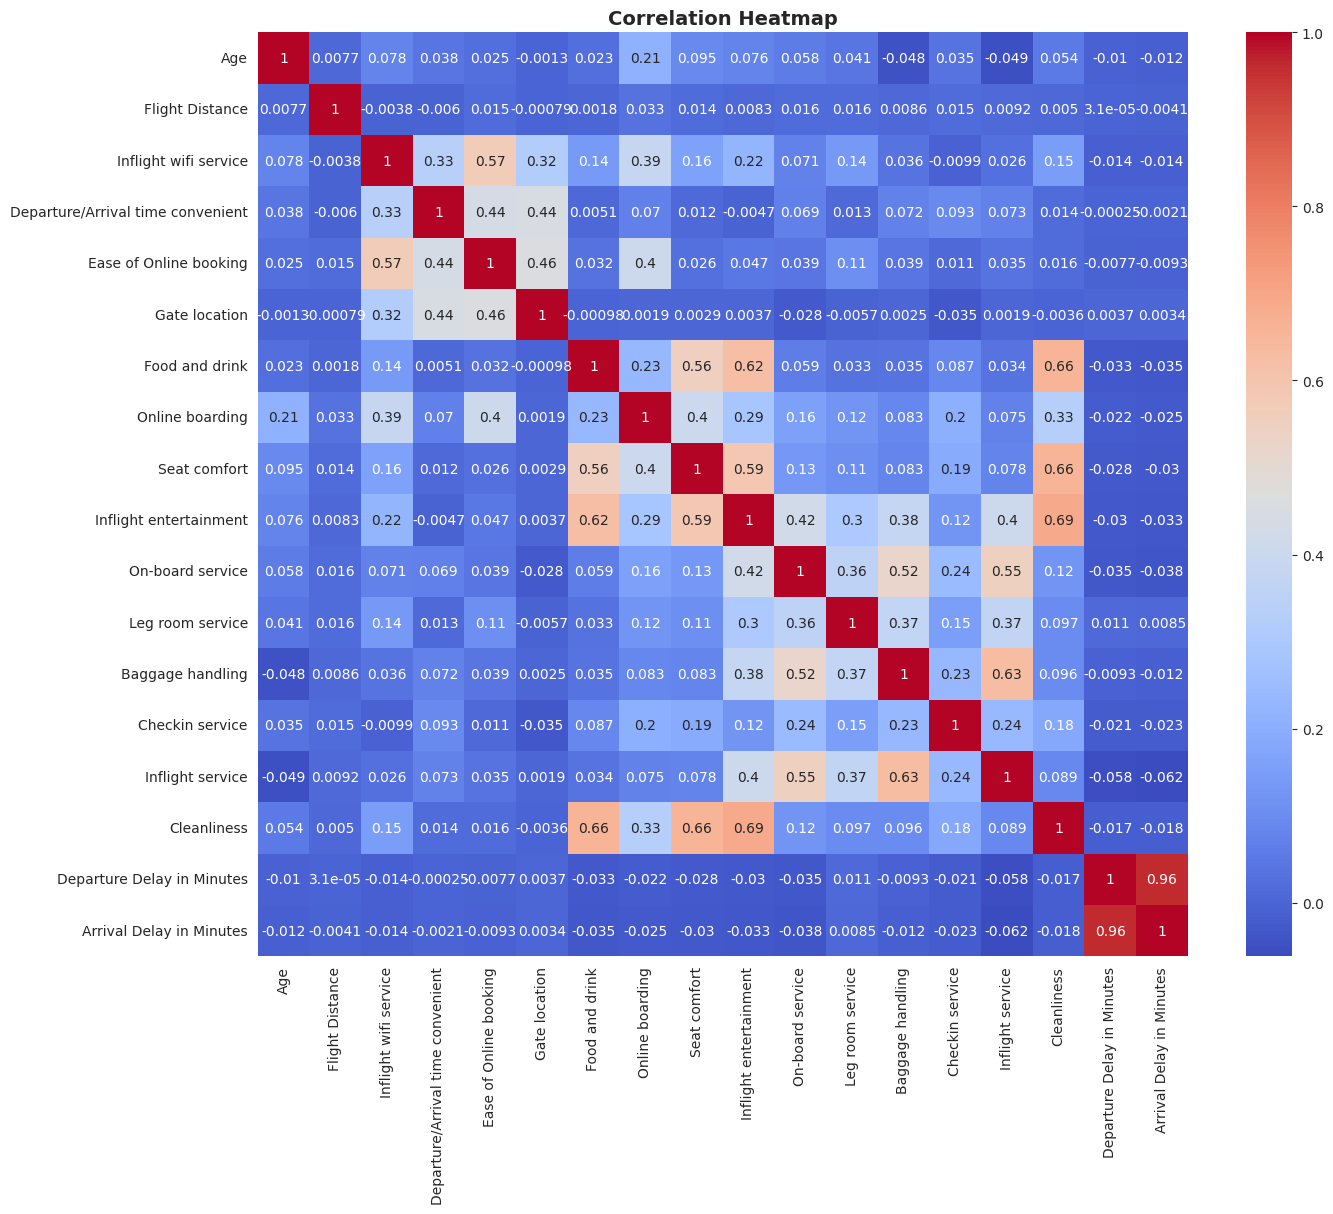

In [ ]:
# Correlation Heatmap

plt.figure(figsize=(15, 12))
corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap", {'fontsize': 14, 'fontweight': 'bold'})
plt.show()

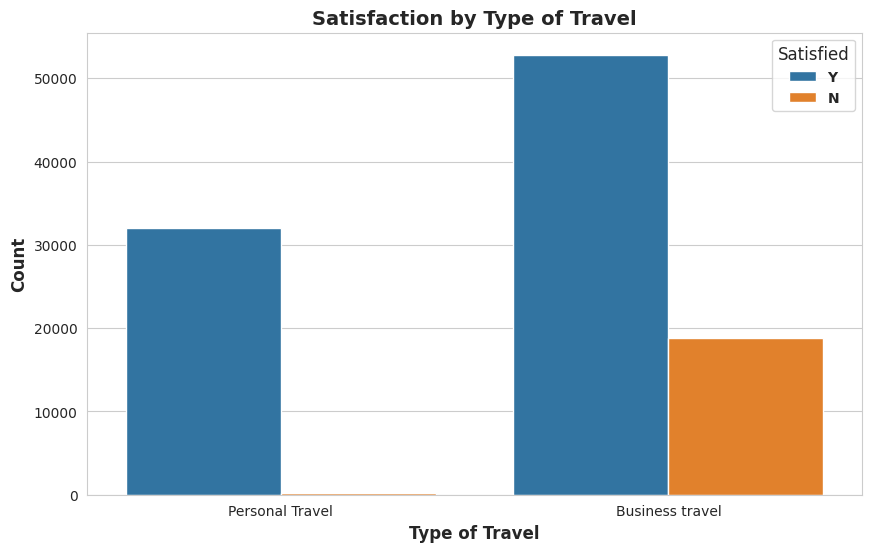

In [ ]:
# Visualization of the Satisfaction by Type of Travel

plt.figure(figsize=(10, 6))
sns.countplot(x="Type of Travel", hue="Satisfied", data=df)
plt.title("Satisfaction by Type of Travel", {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Type of Travel",fontsize=12, fontweight='bold')
plt.ylabel("Count",fontsize=12, fontweight='bold')
plt.legend(title="Satisfied",loc="upper right", title_fontsize=12, prop={'weight': 'bold'})
plt.show()

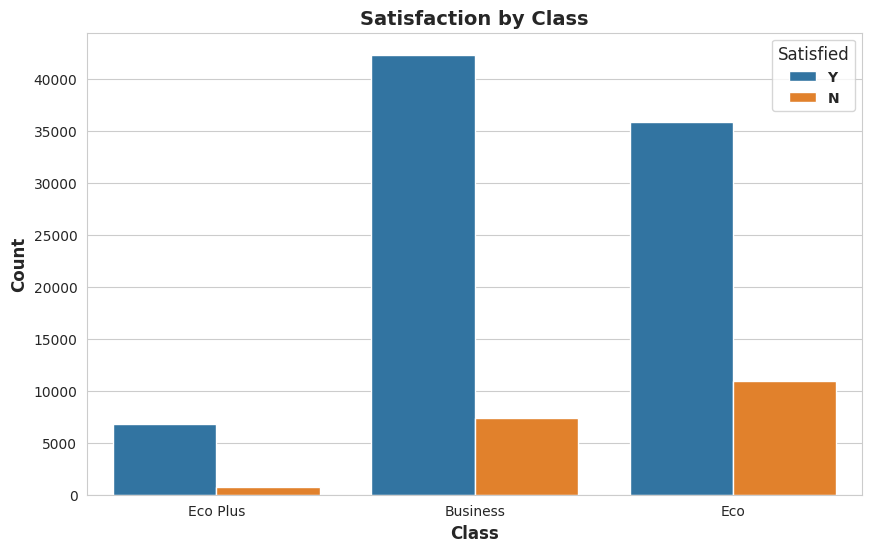

In [ ]:
# Visualization of Satisfaction by Class

plt.figure(figsize=(10, 6))
sns.countplot(x="Class", hue="Satisfied", data=df)
plt.title("Satisfaction by Class", {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Class", fontsize=12, fontweight='bold')
plt.ylabel("Count", fontsize=12, fontweight='bold')
plt.legend(title="Satisfied",loc="upper right", title_fontsize=12, prop={'weight': 'bold'})
plt.show()

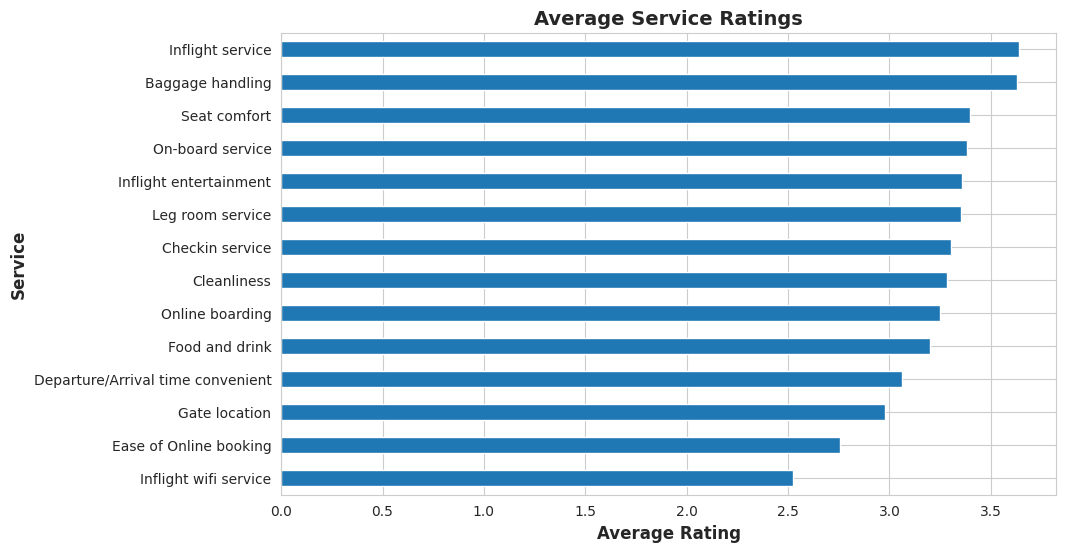

In [ ]:
# Visualization of the Average Ratings of Services
service_ratings = [
    "Inflight wifi service",
    "Departure/Arrival time convenient",
    "Ease of Online booking",
    "Gate location",
    "Food and drink",
    "Online boarding",
    "Seat comfort",
    "Inflight entertainment",
    "On-board service",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Inflight service",
    "Cleanliness",
]
plt.figure(figsize=(10, 6))
avg_ratings = df[service_ratings].mean().sort_values()
avg_ratings.plot(kind="barh")
plt.title("Average Service Ratings",{'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Average Rating", fontsize=12, fontweight='bold')
plt.ylabel("Service", fontsize=12, fontweight='bold')
plt.show()

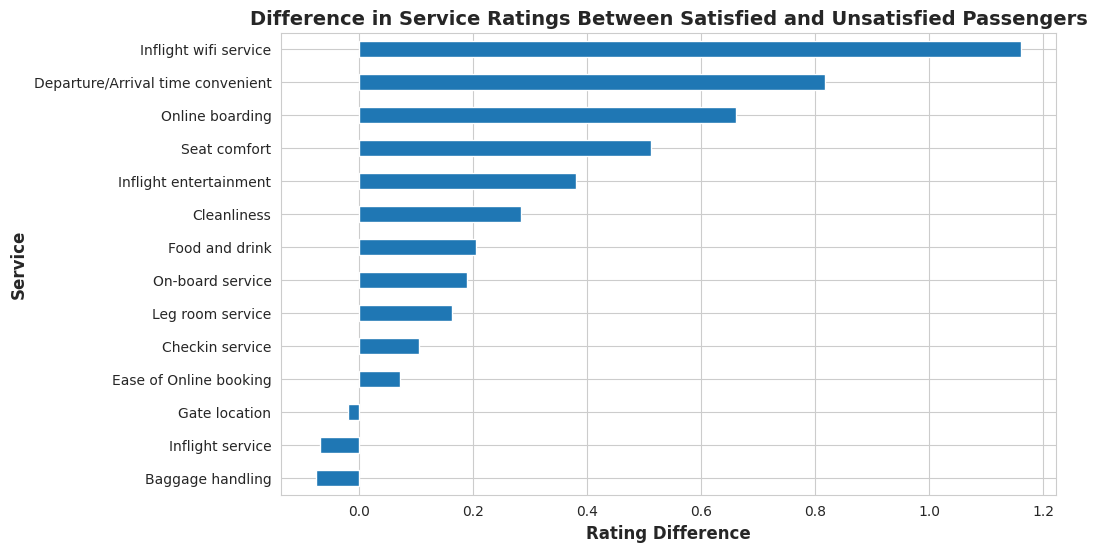

In [ ]:
# Visualization of the Service Ratings by Satisfaction
satisfied = df[df["Satisfied"] == 'Y']
unsatisfied = df[df["Satisfied"] == 'N']
satisfied_mean = satisfied[service_ratings].mean()
unsatisfied_mean = unsatisfied[service_ratings].mean()
rating_difference = pd.DataFrame(
    {"Satisfied": satisfied_mean, "Unsatisfied": unsatisfied_mean}
)
rating_difference["Difference"] = (
    rating_difference["Satisfied"] - rating_difference["Unsatisfied"]
)
plt.figure(figsize=(10, 6))
rating_difference["Difference"].sort_values().plot(kind="barh")
plt.title("Difference in Service Ratings Between Satisfied and Unsatisfied Passengers", {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Rating Difference", fontsize=12, fontweight='bold')
plt.ylabel("Service", fontsize=12, fontweight='bold')
plt.show()

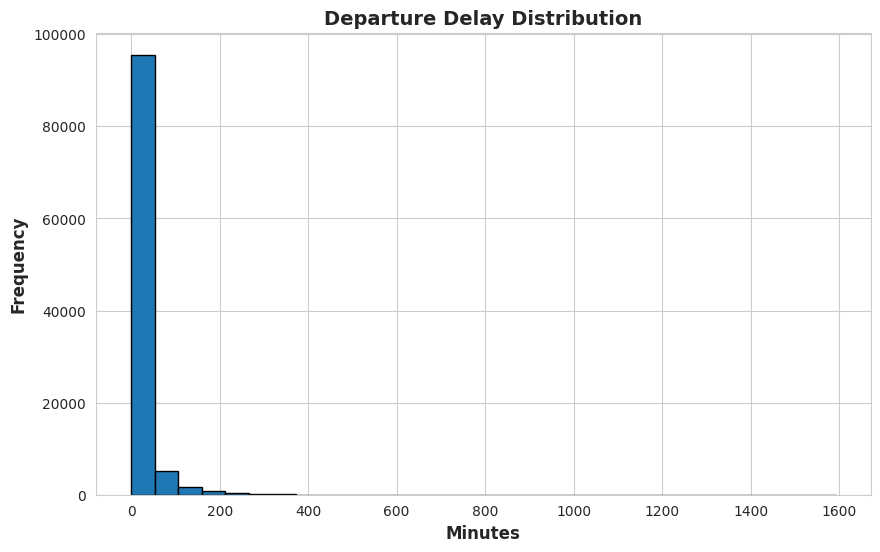

In [ ]:
# Visualization of the Departure Delay Distribution

plt.figure(figsize=(10, 6))
plt.hist(df["Departure Delay in Minutes"], bins=30, edgecolor="k")
plt.title("Departure Delay Distribution", {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Minutes", fontsize=12, fontweight='bold')
plt.ylabel("Frequency", fontsize=12, fontweight='bold')
plt.show()

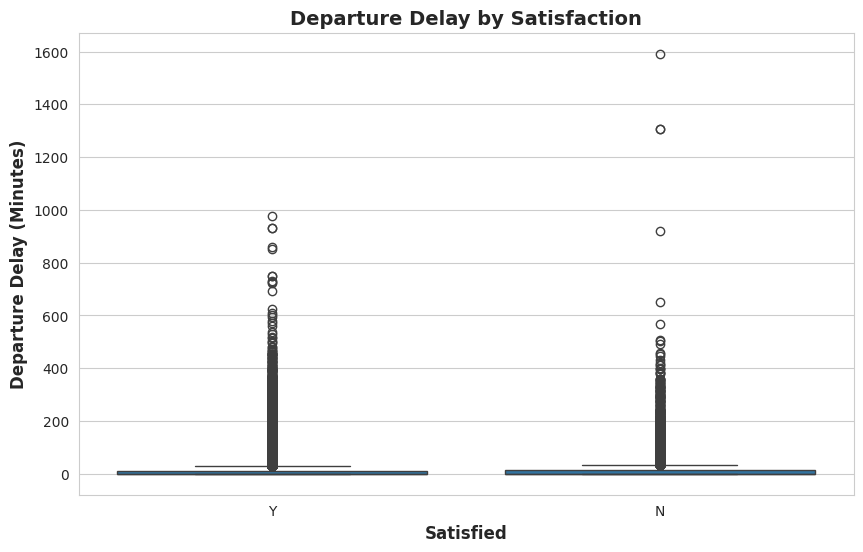

In [ ]:
# Visualization of Satisfaction vs. Departure Delay

plt.figure(figsize=(10, 6))
sns.boxplot(x="Satisfied", y="Departure Delay in Minutes", data=df)
plt.title("Departure Delay by Satisfaction", {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Satisfied", fontsize=12, fontweight='bold')
plt.ylabel("Departure Delay (Minutes)", fontsize=12, fontweight='bold')
plt.show()

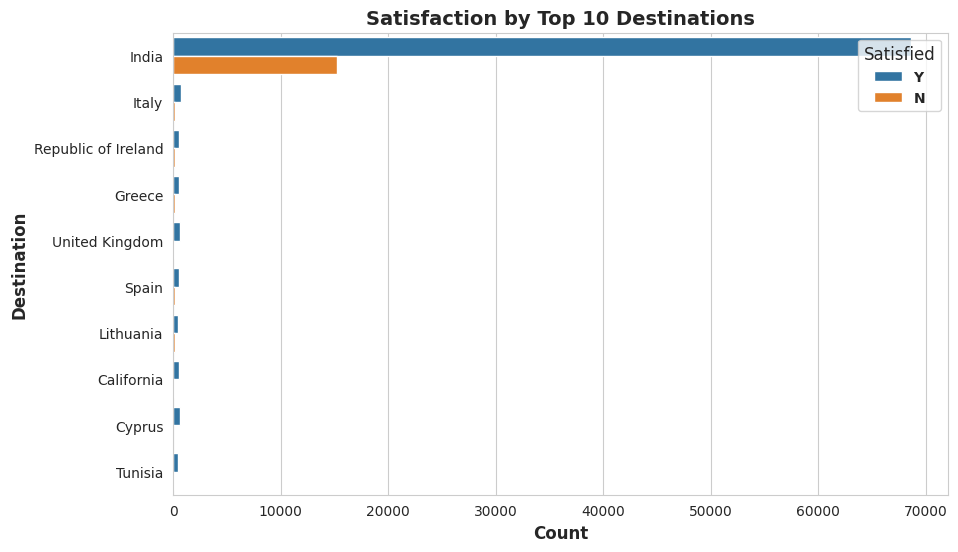

In [ ]:
# Visualization of the Satisfaction by Destination (Top 10)

top_destinations = df["Destination"].value_counts().head(10).index
top_dest_data = df[df["Destination"].isin(top_destinations)]
plt.figure(figsize=(10, 6))
sns.countplot(
    y="Destination",
    hue="Satisfied",
    data=top_dest_data,
    order=top_destinations,
)
plt.title("Satisfaction by Top 10 Destinations", {'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel("Count", fontsize=12, fontweight='bold')
plt.ylabel("Destination", fontsize=12, fontweight='bold')
plt.legend(title="Satisfied", loc="upper right", title_fontsize=12, prop={'weight': 'bold'})
plt.show()

In [ ]:
# Visualization of the World Map Showing Number of Passengers per Destination Country

# Create a DataFrame with counts per destination country
destination_counts = df['Destination'].value_counts().reset_index()
destination_counts.columns = ['Country', 'Passenger Count']


# Use Plotly Express to create a choropleth map
fig = px.choropleth(
    destination_counts,
    locations='Country',
    locationmode='country names',
    color='Passenger Count',
    color_continuous_scale='Blues',
    title='Number of Passengers per Destination Country'
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular'),
    margin={"r":0,"t":50,"l":0,"b":0},
    title={'font_size': 14, 'font_family': 'bold'} # Set title font size and family here
)

fig.show()


In [ ]:
# Visualization of the World Map Showing Average Satisfaction per Destination Country

# Visualization of the World Map Showing Average Satisfaction per Destination Country

# Calculate average satisfaction per destination
destination_satisfaction = df.groupby('Destination')['Satisfied'].apply(lambda x: x.map({'satisfied': 1, 'not satisfied': 0}).mean()).reset_index()
destination_satisfaction.columns = ['Country', 'Average Satisfaction']

# Use Plotly Express to create a choropleth map
fig = px.choropleth(
    destination_satisfaction,
    locations='Country',
    locationmode='country names',
    color='Average Satisfaction',
    color_continuous_scale='RdYlGn',
    range_color=(0, 1),
    title='Average Passenger Satisfaction per Destination Country'
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=True, projection_type='equirectangular'),
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()



In [ ]:
# Visualization 18: Average Satisfaction Levels by Continent

# Calculate average satisfaction per continent
continent_satisfaction = df.groupby('Continent')['Satisfied'].mean().reset_index()

# Sort by average satisfaction
continent_satisfaction.sort_values('Satisfied', ascending=False, inplace=True)

# Plot bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Satisfied', y='Continent', data=continent_satisfaction, palette='viridis')
plt.title('Average Passenger Satisfaction by Continent')
plt.xlabel('Average Satisfaction')
plt.ylabel('Continent')
plt.xlim(0, 1)
plt.show()


TypeError: agg function failed [how->mean,dtype->object]